# Projeto - Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("/content/CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




## Solução

### 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [29]:
# Verifica tipo e dados não nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          2500 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2500 non-null   int64  
 3   Casado              2500 non-null   object 
 4   Dependents          2500 non-null   object 
 5   Tempo_como_Cliente  2500 non-null   int64  
 6   PhoneService        1018 non-null   object 
 7   Servico_Internet    2500 non-null   object 
 8   Servico_Seguranca   2500 non-null   object 
 9   Suporte_Tecnico     2500 non-null   object 
 10  StreamingTV         2500 non-null   object 
 11  Tipo_Contrato       2500 non-null   object 
 12  PaymentMethod       2500 non-null   object 
 13  Pagamento_Mensal    2175 non-null   float64
 14  Total_Pago          2500 non-null   float64
 15  Churn               2495 non-null   object 
dtypes: flo

Os tipos dos dados estão de acordo com as informações de cada coluna.

### 2 - Esse exercício faremos por etapas:


#### A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [30]:
# Verifica se existem dados nulos
df.isnull().values.any()

True

In [31]:
# Verifica a quantidade de nulos por coluna
df.isnull().sum()

,0
customerID,0
Genero,12
Idoso,0
Casado,0
Dependents,0
Tempo_como_Cliente,0
PhoneService,1482
Servico_Internet,0
Servico_Seguranca,0
Suporte_Tecnico,0


In [32]:
# Verifica a porcentagem de nulos por coluna
(df.isnull().sum() / df.shape[0]) * 100

,0
customerID,0.00
Genero,0.48
Idoso,0.00
Casado,0.00
Dependents,0.00
Tempo_como_Cliente,0.00
PhoneService,59.28
Servico_Internet,0.00
Servico_Seguranca,0.00
Suporte_Tecnico,0.00


Verificamos a presença de dados nulos em Genero, PhoneService, Pagamento_Mensal e Churn.

#### B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

##### Coluna Genero

In [33]:
# Verifica linhas com dados nulos em Genero
df[df['Genero'].isnull()]

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN
10,9763-GRSKD,NaN,0,Yes,Yes,13,Yes,dsl,Yes,No,No,Month-to-month,Mailed check,NaN,587.45,No
11,7469-LKBCI,NaN,0,No,No,16,Yes,No,No internet service,No internet service,No internet service,Two year,Credit card (automatic),NaN,326.80,No
12,8091-TTVAX,NaN,0,Yes,No,58,Yes,Fiber optic,No,No,Yes,One year,Credit card (automatic),NaN,5681.10,No
13,0280-XJGEX,NaN,0,No,No,49,Yes,Fiber optic,No,No,Yes,Month-to-month,Bank transfer (automatic),NaN,5036.30,Yes


A coluna de Genero possui apenas 0,5% de dados nulos. Portanto, vamos excluir os dados nulos dessa coluna.

In [34]:
# Remove dados nulos em Genero
df.dropna(subset=['Genero'], inplace=True)

# Verifica dados nulos em Genero
df['Genero'].isnull().any()

False

##### Coluna Churn

In [35]:
# Verifica dados nulos em Churn
df['Churn'].isnull().sum()

0

Com a remoção de dados nulos em Genero, também foram excluídos todos os dados nulos em Churn, que representavam apenas 0,2% dos dados.

#### C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

Como temos uma porcentagem de nulos muito alta para PhoneService (59,3%) e Pagamento_Mensal (13%), vamos avaliar essas colunas com mais atenção para decidir os próximos passos.

##### Coluna PhoneService

In [36]:
# Verifica porcentagem de dados na coluna
df['PhoneService'].value_counts(normalize=True) * 100

,proportion
PhoneService,
Yes,91.451292
No,8.548708


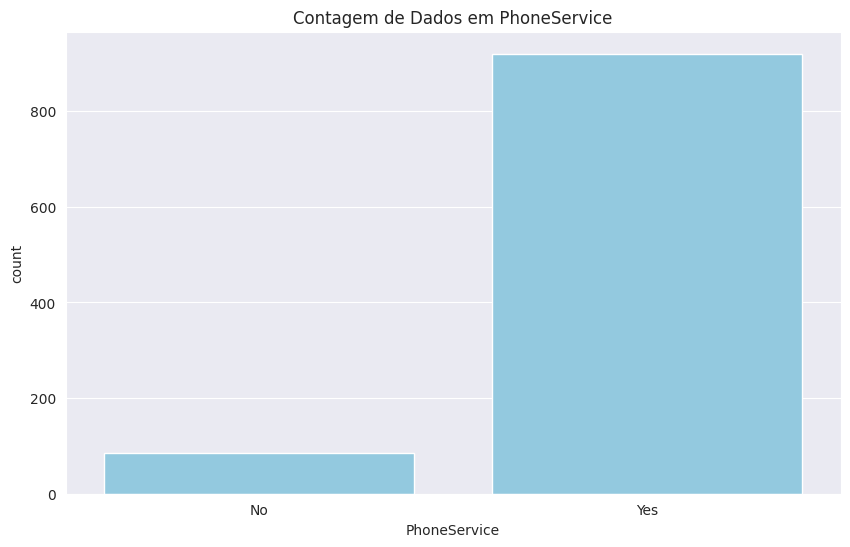

In [37]:
# Verifica contagem de dados na coluna
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PhoneService', color='skyblue')
plt.title('Contagem de Dados em PhoneService')
plt.show()

A grande maioria das entradas em PhoneService possui `Yes` (91,4%). Assim, temos 91,4% de chances de acertar ao substituir os dados nulos dessa coluna por `Yes`.

In [38]:
# Substitui dados nulos por Yes
df['PhoneService'] = df['PhoneService'].fillna('Yes')

# Verifica dados nulos em PhoneService
df['PhoneService'].isnull().any()

False

##### Coluna Pagamento_Mensal

In [39]:
# Média da coluna Pagamento_Mensal
mean_pagamento_mensal = df['Pagamento_Mensal'].mean()
mean_pagamento_mensal

65.60756321839081

In [40]:
# Mediana da coluna Pagamento_Mensal
median_pagamento_mensal = df['Pagamento_Mensal'].median()
median_pagamento_mensal

71.45

Comparando média (65,6) e mediana (71,4), observamos uma pequena diferença. Vamos analisar a distribuição visualmente.

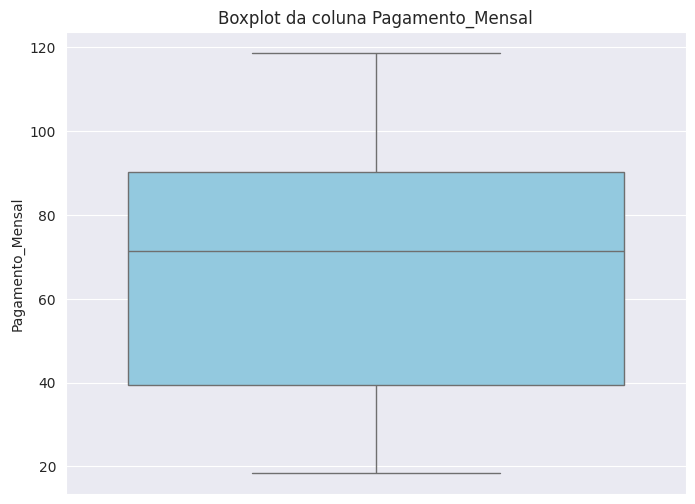

In [41]:
# Plota o boxplot da coluna Pagamento_Mensal
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Pagamento_Mensal', color='skyblue')
plt.title('Boxplot da coluna Pagamento_Mensal')
plt.show()

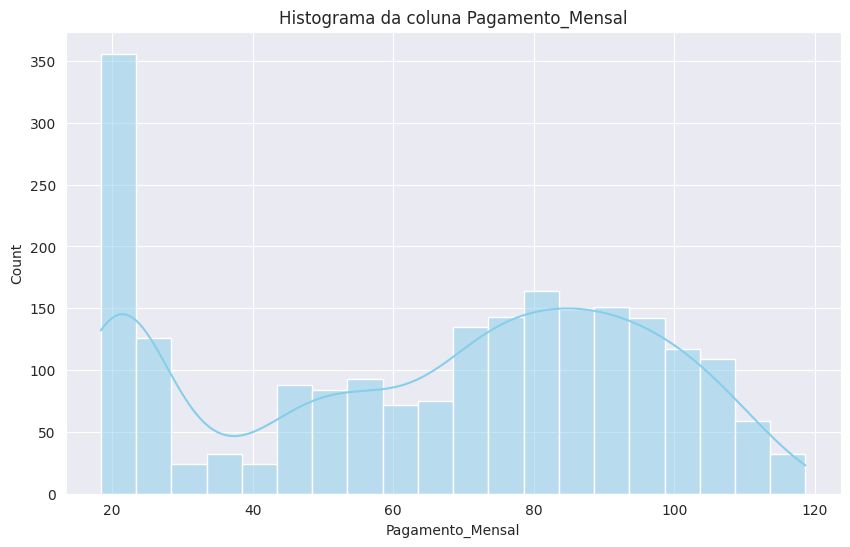

In [42]:
# Plota o histograma da coluna Pagamento_Mensal
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Pagamento_Mensal', bins=20, kde=True, color='skyblue')
plt.title('Histograma da coluna Pagamento_Mensal')
plt.show()

Observamos que não temos outliers na coluna Pagamento_Mensal, o que é positivo. Como nosso DataFrame não é volumoso e temos 13% de dados nulos nessa coluna, vamos fazer a substituição dos dados nulos pela mediana.

In [43]:
# Substitui dados nulos pela mediana
df['Pagamento_Mensal'] = df['Pagamento_Mensal'].fillna(median_pagamento_mensal)

# Verifica dados nulos em Pagamento_Mensal
df['Pagamento_Mensal'].isnull().any()

False

In [44]:
# Verifica dados nulos no DataFrame
df.isnull().values.any()

False

### 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [45]:
# Remove coluna com informações sensíveis
df.drop(columns=['customerID'], inplace=True)

In [46]:
# Seleciona nomes das colunas textuais
colunas_texo = df.select_dtypes(include='object').columns

# Padroniza todos os dados para letras minúsculas
for coluna in colunas_texo:
    df[coluna] = df[coluna].str.lower()

df.sample(5)

,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
1886,male,0,yes,yes,67,yes,dsl,yes,yes,no,two year,bank transfer (automatic),60.40,3953.70,no
694,female,1,no,no,22,yes,no,no internet service,no internet service,no internet service,one year,mailed check,20.05,417.00,no
973,male,1,yes,no,44,yes,dsl,no,no,no,month-to-month,electronic check,30.35,1359.70,yes
1054,male,0,yes,no,40,yes,fiber optic,no,no,yes,month-to-month,bank transfer (automatic),97.10,3706.95,yes
862,male,1,yes,no,20,yes,fiber optic,no,no,no,month-to-month,electronic check,73.65,1463.50,yes


In [47]:
# Seleciona colunas textuais
df_colunas_texo = df.select_dtypes(include='object')

# Verifica dados únicos
for coluna in df_colunas_texo:
    print(coluna, df[coluna].unique())

Genero ['female' 'male' 'f' 'm']
Casado ['yes' 'no']
Dependents ['no' 'yes']
PhoneService ['no' 'yes']
Servico_Internet ['dsl' 'no' 'fiber optic']
Servico_Seguranca ['no' 'yes' 'no internet service']
Suporte_Tecnico ['no' 'yes' 'no internet service']
StreamingTV ['no' 'no internet service' 'yes']
Tipo_Contrato ['month-to-month' 'one year' 'two year']
PaymentMethod ['electronic check' 'mailed check' 'bank transfer (automatic)'
 'credit card (automatic)']
Churn ['no' 'yes']


Observamos que a coluna Genero possui inconsistências nos dados. Vamos fazer as substituições necessárias.

In [48]:
# Uniformização de dados em Genero
df['Genero'] = df['Genero'].replace({'f': 'female', 'm': 'male'})

# Confere dados únicos
df['Genero'].unique()

array(['female', 'male'], dtype=object)

### [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixando em português, ou inglês.

In [49]:
# Padroniza o nome das colunas em inglês
columns = {
    'Genero': 'Gender',
    'Idoso': 'IsSenior',
    'Casado': 'Married',
    'Tempo_como_Cliente': 'ClientMonths',
    'Servico_Internet': 'InternetService',
    'Servico_Seguranca': 'OnlineSecurity',
    'Suporte_Tecnico': 'TechSupport',
    'Tipo_Contrato': 'ContractType',
    'Pagamento_Mensal': 'MonthlyCharges',
    'Total_Pago': 'TotalCharges',
}

df.rename(columns=columns, inplace=True)

df.sample(5)

,Gender,IsSenior,Married,Dependents,ClientMonths,PhoneService,InternetService,OnlineSecurity,TechSupport,StreamingTV,ContractType,PaymentMethod,MonthlyCharges,TotalCharges,Churn
492,female,0,yes,no,2,yes,fiber optic,yes,no,no,month-to-month,electronic check,74.40,56.05,yes
477,female,0,yes,yes,7,yes,dsl,yes,yes,yes,month-to-month,electronic check,75.70,554.05,no
2332,female,0,yes,no,47,yes,dsl,yes,no,yes,one year,credit card (automatic),66.05,3021.45,no
497,female,0,yes,no,70,yes,no,no internet service,no internet service,no internet service,two year,bank transfer (automatic),19.80,1397.65,no
2262,female,0,no,no,2,yes,fiber optic,no,no,yes,month-to-month,electronic check,80.20,146.05,yes


In [50]:
# Salvando o DataFrame
df.to_csv('CHURN_TELECON_MOD08_TAREFA_PARTE2.csv', index=False)